In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
sns.set(rc={'figure.figsize':(80,20)})

In [ ]:
uploaded = files.upload()

Saving 65 Years of Weather Data Bangladesh (1948 - 2013).csv to 65 Years of Weather Data Bangladesh (1948 - 2013).csv


In [ ]:
df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [ ]:
df.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [ ]:
df.columns

Index(['Unnamed: 0', 'Station Names', 'YEAR', 'Month', 'Max Temp', 'Min Temp',
       'Rainfall', 'Relative Humidity', 'Wind Speed', 'Cloud Coverage',
       'Bright Sunshine', 'Station Number', 'X_COR', 'Y_COR', 'LATITUDE',
       'LONGITUDE', 'ALT', 'Period'],
      dtype='object')

In [ ]:
df['Station Names'].value_counts()

Faridpur                     792
Dinajpur                     792
Comilla                      792
Satkhira                     792
Khulna                       792
Mymensingh                   792
Cox's Bazar                  792
Jessore                      792
Bogra                        792
Srimangal                    792
Chittagong (IAP-Patenga)     780
Barisal                      780
Maijdee Court                756
Dhaka                        732
Rangpur                      720
Sylhet                       696
Rangamati                    684
Ishurdi                      636
Rajshahi                     600
Chandpur                     600
Hatiya                       576
Sandwip                      576
Bhola                        576
Feni                         492
Patuakhali                   492
Khepupara                    480
Teknaf                       444
Madaripur                    444
Kutubdia                     444
Sitakunda                    444
Tangail   

In [ ]:
df[df['Station Names']=='Dhaka'].head(100)

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
5460,5460,Dhaka,1953,1,26.7,10.9,10.0,70.0,0.725926,1.7,7.343396,41923,540098.6,629248.4,23.78,90.39,9,1953.01
5461,5461,Dhaka,1954,1,29.2,9.9,14.0,70.0,0.725926,0.9,7.343396,41923,540098.6,629248.4,23.78,90.39,9,1954.01
5462,5462,Dhaka,1955,1,27.4,11.0,0.0,71.0,0.725926,1.4,7.343396,41923,540098.6,629248.4,23.78,90.39,9,1955.01
5463,5463,Dhaka,1956,1,28.0,11.2,12.0,68.0,0.725926,0.6,7.343396,41923,540098.6,629248.4,23.78,90.39,9,1956.01
5464,5464,Dhaka,1957,1,28.0,13.0,68.0,77.0,0.725926,2.0,7.343396,41923,540098.6,629248.4,23.78,90.39,9,1957.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,5555,Dhaka,1987,2,34.0,16.4,0.0,65.0,0.500000,1.3,8.800000,41923,540098.6,629248.4,23.78,90.39,9,1987.02
5556,5556,Dhaka,1988,2,32.8,16.3,44.0,67.0,0.500000,1.7,8.100000,41923,540098.6,629248.4,23.78,90.39,9,1988.02
5557,5557,Dhaka,1989,2,32.6,15.4,32.0,64.0,1.100000,0.9,8.900000,41923,540098.6,629248.4,23.78,90.39,9,1989.02
5558,5558,Dhaka,1990,2,30.4,17.3,36.0,69.0,0.600000,2.5,8.400000,41923,540098.6,629248.4,23.78,90.39,9,1990.02


In [ ]:
df_dhaka = df[['YEAR','Month','Max Temp','Min Temp','Rainfall','Relative Humidity', 'Wind Speed', 'Cloud Coverage']][df['Station Names']=='Dhaka']

In [ ]:
df_dhaka.count()

YEAR                 732
Month                732
Max Temp             732
Min Temp             732
Rainfall             732
Relative Humidity    732
dtype: int64

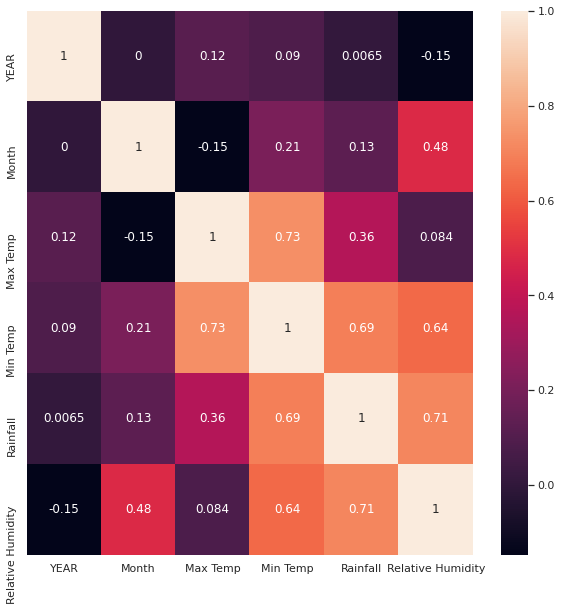

In [ ]:
corrMatrix = df_dhaka.corr()
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_dhaka.head()

,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity
5460,1953,1,26.7,10.9,10.0,70.0
5461,1954,1,29.2,9.9,14.0,70.0
5462,1955,1,27.4,11.0,0.0,71.0
5463,1956,1,28.0,11.2,12.0,68.0
5464,1957,1,28.0,13.0,68.0,77.0


In [ ]:
df_dhaka[['Rainfall','Month']][df_dhaka['YEAR']==2013].mean()

Rainfall    132.5
Month         6.5
dtype: float64

In [ ]:
for i in range(1953,2012):
  x = df_dhaka['Rainfall'][df_dhaka['YEAR']==i].mean()
  print(i,': ', x)

In [ ]:
df_dhaka['Rainfall'][df_dhaka['YEAR']==1953]

5460     10.0
5521      2.0
5582     90.0
5643     90.0
5704    274.0
5765    333.0
5826    392.0
5887    326.0
5948    352.0
6009     52.0
6070     13.0
6131      0.0
Name: Rainfall, dtype: float64

In [ ]:
dhaka_rainfall = dict()
for i in range (1953,2010):
  dhaka_rainfall[i] = df_dhaka['Rainfall'][df_dhaka['YEAR']==i].sum()
  

In [ ]:
dhaka_rainfall

In [ ]:
dhaka_rainfall[1954] 

2274.0

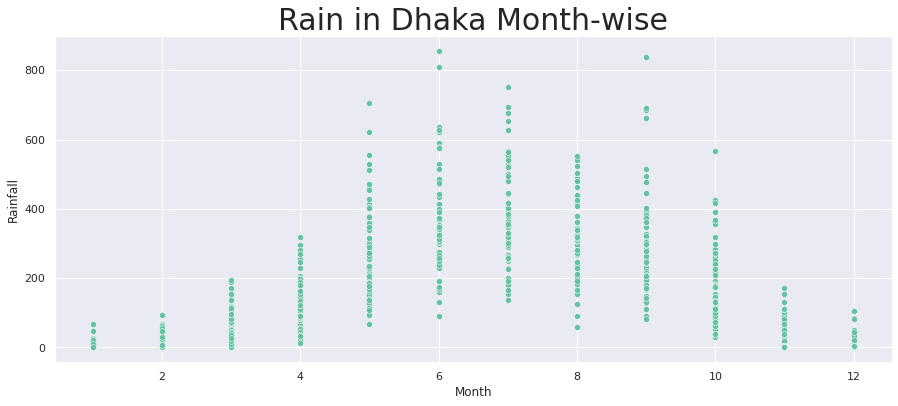

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
ax = sns.scatterplot(x = 'Month', y = 'Rainfall',data = df_dhaka)
ax.set_title( "Rain in Dhaka Month-wise",size = 30 )
plt.show()

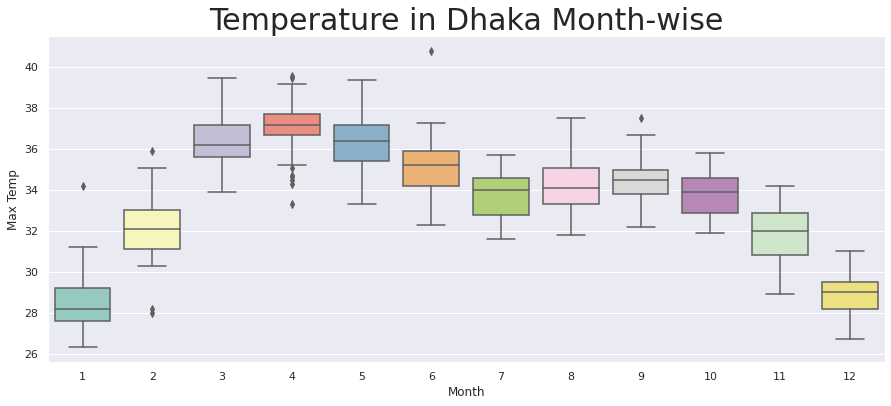

In [ ]:
sns.set_style('darkgrid')
#sns.set_palette('Set3')
plt.figure(figsize=[15,6])
ax = sns.boxplot(x = 'Month', y = 'Max Temp',data = df_dhaka)
ax.set_title( "Temperature in Dhaka Month-wise",size = 30 )
plt.show()

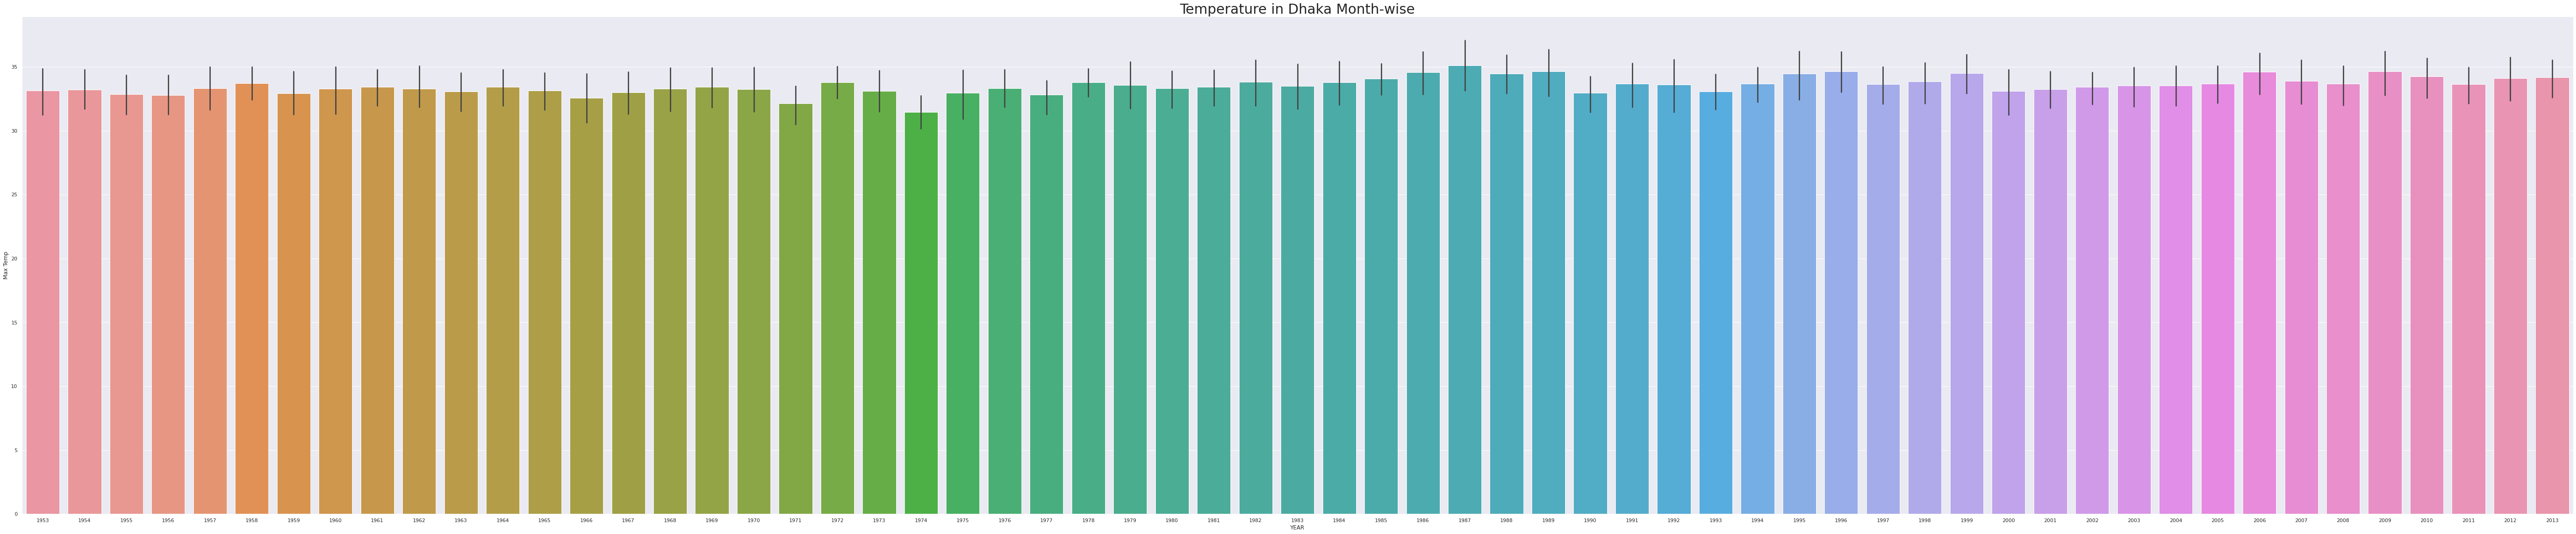

In [ ]:
plt.figure(figsize=[100,20])
ax = sns.barplot(x = 'YEAR', y = 'Max Temp',data = df_dhaka)
ax.set_title( "Temperature in Dhaka Month-wise",size = 30 )
plt.show()

In [ ]:
df_rainfall = pd.DataFrame(dhaka_rainfall.items(), columns=['Year', 'Rainfall'])

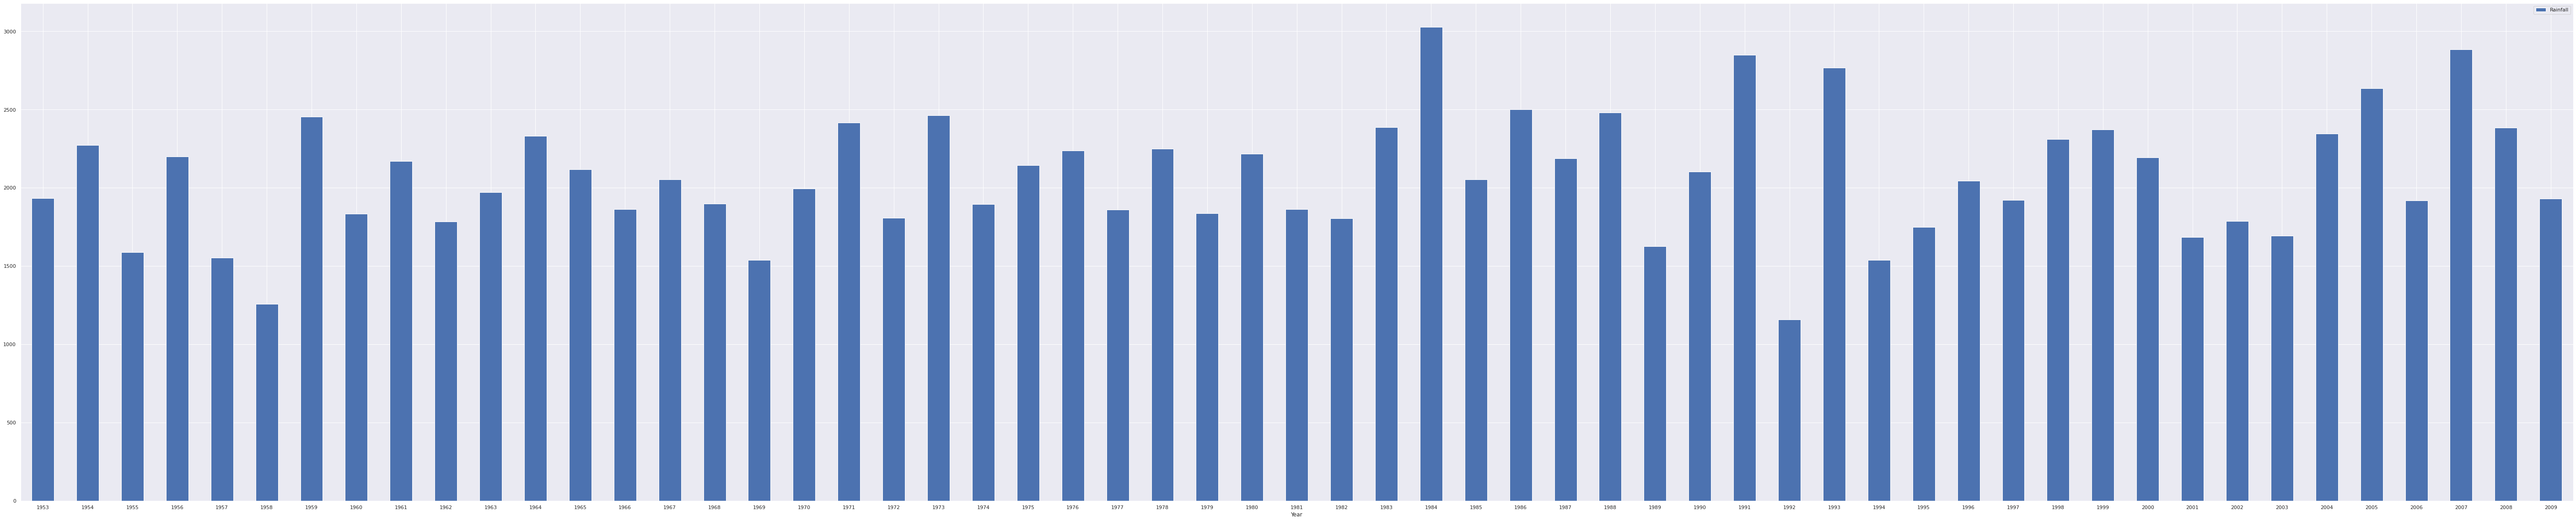

In [ ]:
ax = df_rainfall.plot.bar(x='Year', y='Rainfall', rot=0)

In [ ]:
total_rainfall = dict()
for i in range (1953,2010):
  total_rainfall[i] = df['Rainfall'][df['YEAR']==i].mean()

In [ ]:
total_rainfall[1954]

190.02777777777777

In [ ]:
df_totalrainfall = pd.DataFrame(total_rainfall.items(), columns=['Year', 'Rainfall'])

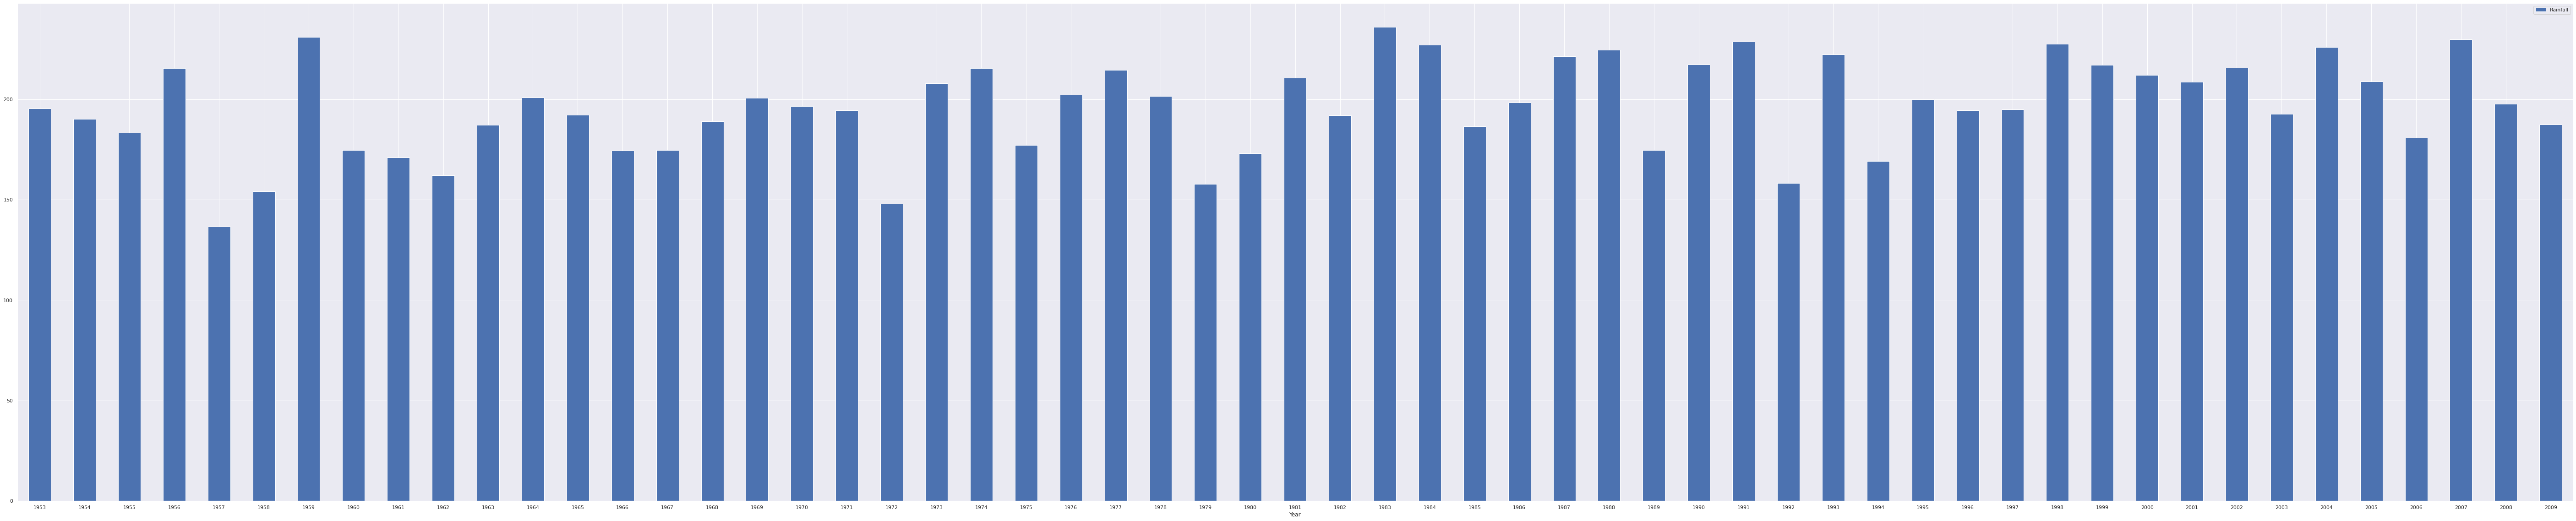

In [ ]:
ax = df_totalrainfall.plot.bar(x='Year', y='Rainfall', rot=0)

In [ ]:
df_dhaka.columns

Index(['YEAR', 'Month', 'Max Temp', 'Min Temp', 'Rainfall',
       'Relative Humidity', 'Wind Speed', 'Cloud Coverage'],
      dtype='object')

In [ ]:
df_dhaka.head()

,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage
5460,1953,1,26.7,10.9,10.0,70.0,0.725926,1.7
5461,1954,1,29.2,9.9,14.0,70.0,0.725926,0.9
5462,1955,1,27.4,11.0,0.0,71.0,0.725926,1.4
5463,1956,1,28.0,11.2,12.0,68.0,0.725926,0.6
5464,1957,1,28.0,13.0,68.0,77.0,0.725926,2.0


In [ ]:
dhaka_yearly_max 

<Figure size 720x720 with 0 Axes>

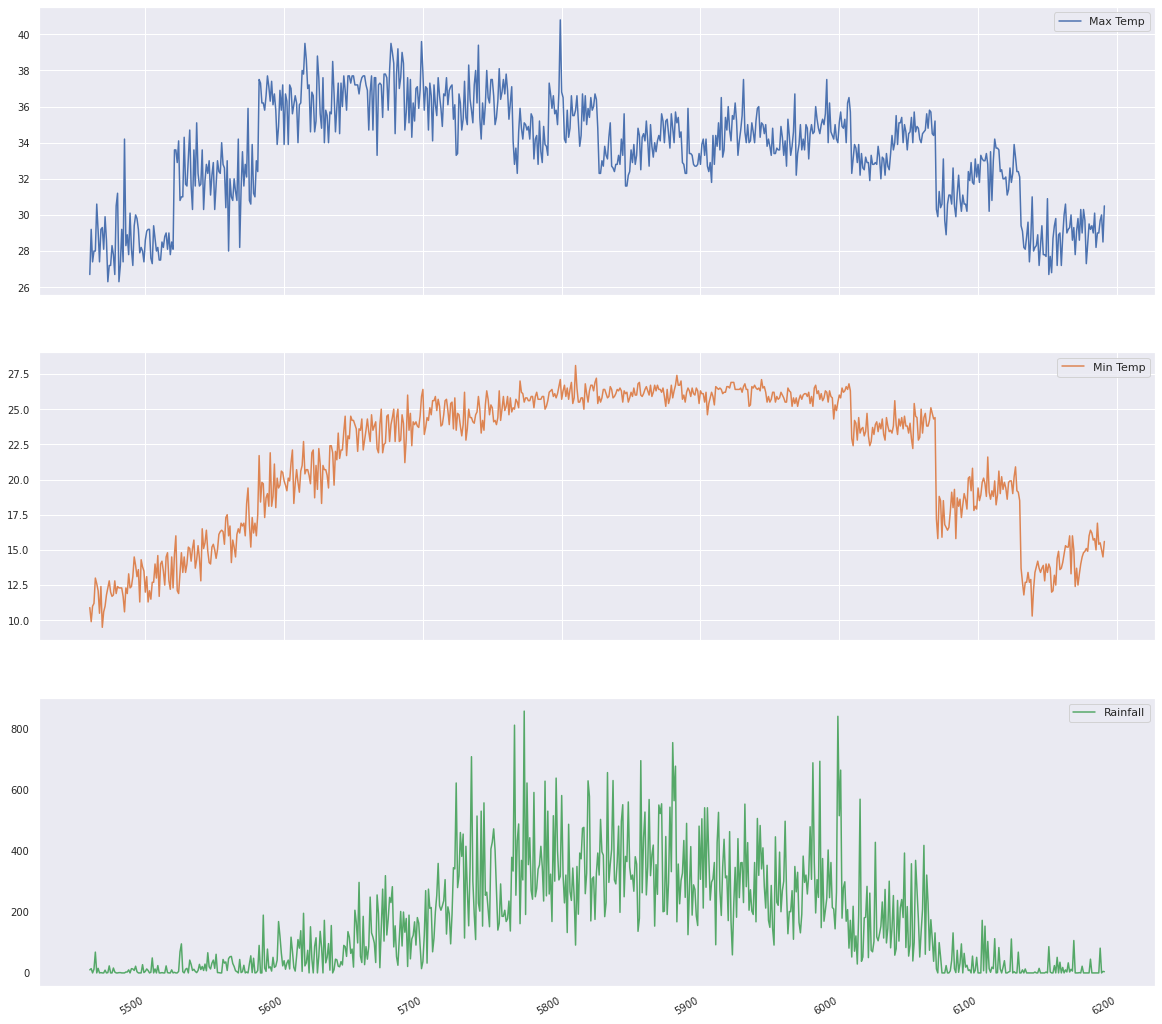

In [ ]:
fig = plt.figure()
x = (df_dhaka[['Max Temp','Min Temp','Rainfall']])
x.plot(grid =True, subplots = True,figsize = (20,20), fontsize = 10, legend = 'reverse')
#title = 'How Numerical value changes with respect to time '
#fig.suptitle = 'Temparature vs Rainfall Vs WindGustSpeed'
plt.grid()
plt.show()